In [1]:
import numpy as np

In [ ]:
def activation_func(x):
    return 1 / (1 + np.exp(-np.clip(x, -50, 50)))
def derivative(x):
    return activation_func(x)*(1-activation_func(x))

class NN:
    def __init__(self, input_num=1, hidden=[2,3], output_num=1):
        self.input_num = input_num
        self.hidden = hidden
        self.output_num = output_num

        self.layers = [input_num] + hidden + [output_num]

        self.weights = []
        for i in range(len(self.layers)-1):
            w = np.random.rand(self.layers[i], self.layers[i+1]) *(-0.5) # Normalna inicjalizacja
            self.weights.append(w)
        
        self.biases = [np.random.rand(1, self.layers[i+1]) for i in range(len(self.layers)-1)]
  
    
    def forward_propagation(self, input):
        self.activations =[input]
        self.zs =[input]
        for i in range(len(self.weights)):
            z = np.dot(self.activations[i], self.weights[i]) + self.biases[i]
            self.zs.append(z)
            if i == len(self.weights)-1 :
                a = z
            else:
                a = activation_func(z)
            self.activations.append(a)
        return self.activations[-1]
    
    def backpropagate(self, y_pred, y, learning_rate):
        
       
        deltas = [(y_pred - y)]

        for i in reversed(range(len(self.weights))):
            
            deriv = activation_func(self.zs[i])*(1- activation_func(self.zs[i]))
            delta =  np.dot(deltas[0], self.weights[i].T) *deriv
            deltas.insert(0, delta)
        
        for i in range(len(self.weights)):
            
            dW = np.dot(np.array(self.activations[i]).T, deltas[i+1])
            self.weights[i] -= learning_rate * dW
            self.biases[i] -= learning_rate * deltas[i+1]

    def train(self, x,y, epochs=1000,  learning_rate=0.1, batch_size=None):
        X_train = np.array(x)
        y_train = np.array(y)

        for epoch in range(epochs):
           
            if batch_size is None:
                for x,y in zip(X_train, y_train):
                    y_hat = self.forward_propagation(x)
                    
                    self.backpropagate(y_hat,y, learning_rate)
                   
            else:
                for start in range(0, len(X_train), batch_size):
                    end = min(start + batch_size, len(X_train))
                    batch_X = X_train[start:end]
                    batch_y = y_train[start:end]
                 
                    for x, y in zip(batch_X, batch_y):
                        y_hat = self.forward_propagation(x)
                        self.backpropagate(y_hat,y, learning_rate)
                       
                    
            

    def predict(self,x):
        return self.forward_propagation(x)
        
    




In [32]:
import pandas as pd


train_df = pd.read_csv('data/square-simple-training.csv')
test_df = pd.read_csv('data/square-simple-test.csv')
X_train = np.array(train_df['x'].tolist()).reshape(-1,1)
y_train = np.array(train_df['y'].tolist()).reshape(-1,1)
X_test = np.array(test_df['x'].tolist()).reshape(-1,1)
y_test = np.array(test_df['y'].tolist()).reshape(-1,1)

## Próba

In [33]:
nn = NN()
pred = nn.forward_propagation(X_train[0:1,:])
nn.backpropagate(pred, y_train[0:1,:], learning_rate=0.3)

In [34]:
def normalize(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val), min_val, max_val


def denormalize(data, min_val, max_val):
    return data * (max_val - min_val) + min_val

X_train_normalized, min_train_x, max_train_x = normalize(X_train)
y_train_normalized, min_train_y, max_train_y = normalize(y_train)

X_test_normalized, min_test_x, max_test_x = normalize(X_test)

In [44]:
from matplotlib import pyplot as plt


def train_until_target(nn, inputs_train, targets_train, inputs_test, targets_test, min_train_y, max_train_y,learning_rate=0.1, max_epochs=1000, mse_threshold=4):
    epoch = 0
    while epoch < max_epochs:
       
        nn.train(inputs_train, targets_train, epochs=1, learning_rate=learning_rate)
        predictions_test = nn.predict(inputs_test)

        predictions_denormalized = denormalize(predictions_test, min_train_y, max_train_y)
        mse_test = np.average((predictions_denormalized- targets_test)**2)
        
        if epoch%100 ==0:
            print(f"MSE on test data after epoch {epoch}: {mse_test}")
            plt.scatter(inputs_test, predictions_denormalized)
            plt.scatter(inputs_test, targets_test)
            plt.show()

        if mse_test < mse_threshold:
            print(f"Training stopped after {epoch} epochs with MSE = {mse_test}")
            break

        epoch += 1

MSE on test data after epoch 0: 7552.677251580908


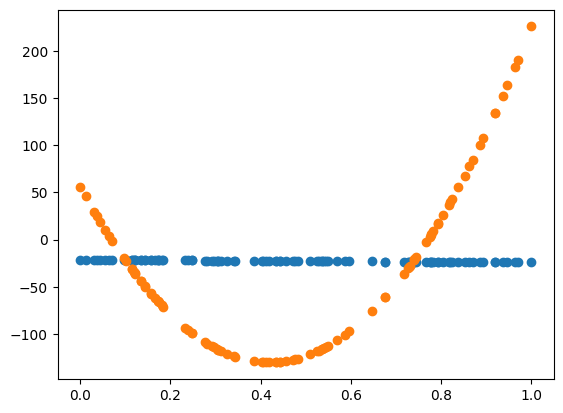

MSE on test data after epoch 100: 7068.086720505198


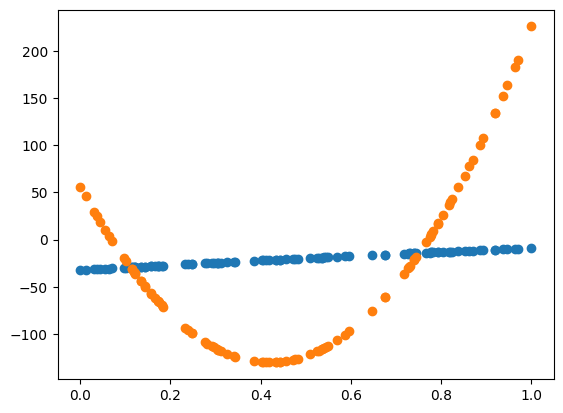

MSE on test data after epoch 200: 5816.08689976483


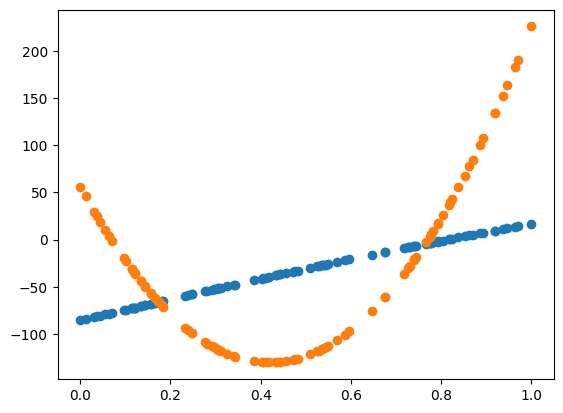

MSE on test data after epoch 300: 5433.001910796864


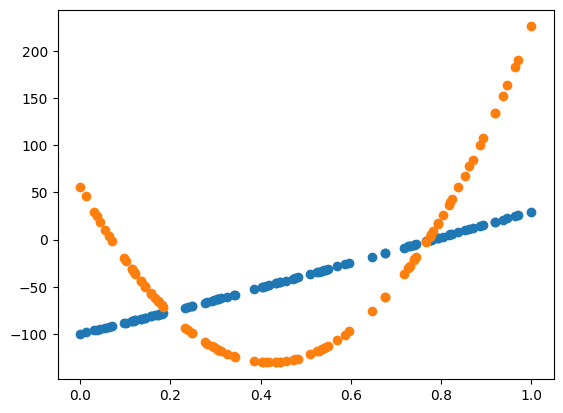

MSE on test data after epoch 400: 4721.493673310063


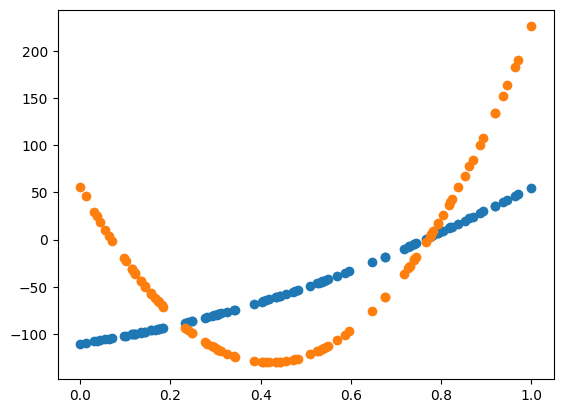

MSE on test data after epoch 500: 2929.7224150297848


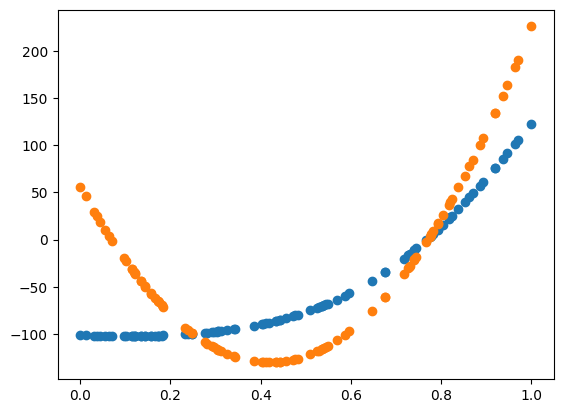

MSE on test data after epoch 600: 209.75251825330125


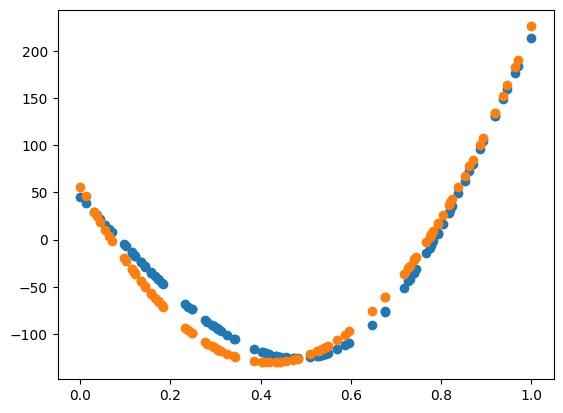

MSE on test data after epoch 700: 161.3775272182986


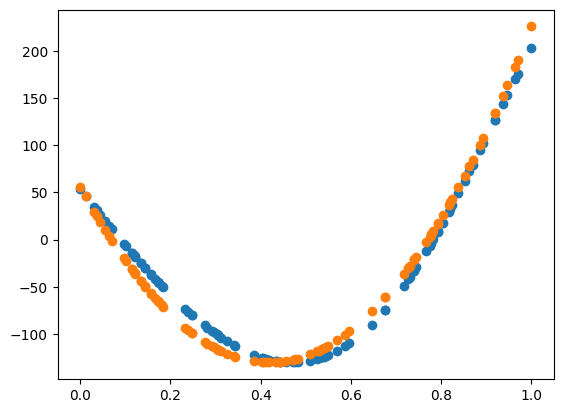

MSE on test data after epoch 800: 142.19961552924934


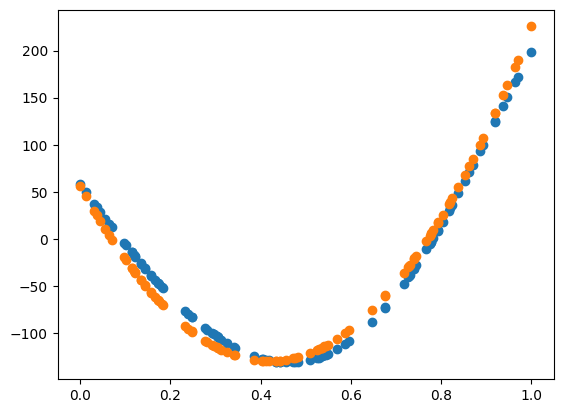

MSE on test data after epoch 900: 131.09989022602153


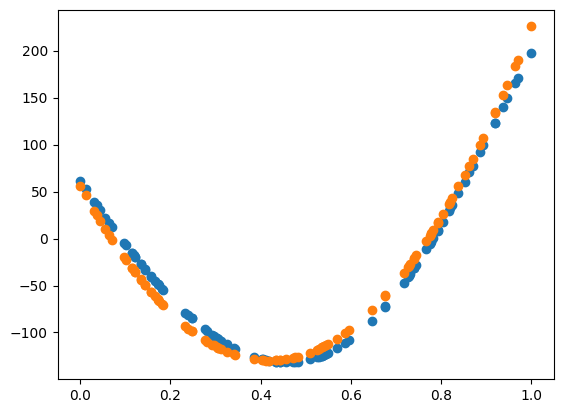

MSE on test data after epoch 1000: 123.2132463280342


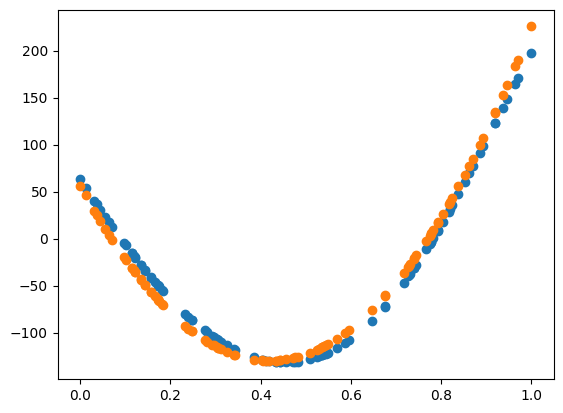

MSE on test data after epoch 1100: 117.2661431825255


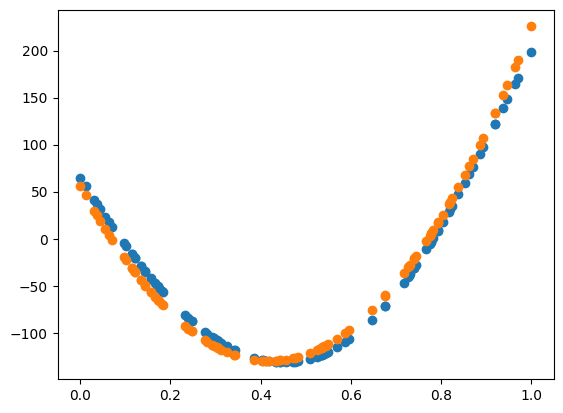

MSE on test data after epoch 1200: 112.66705437266981


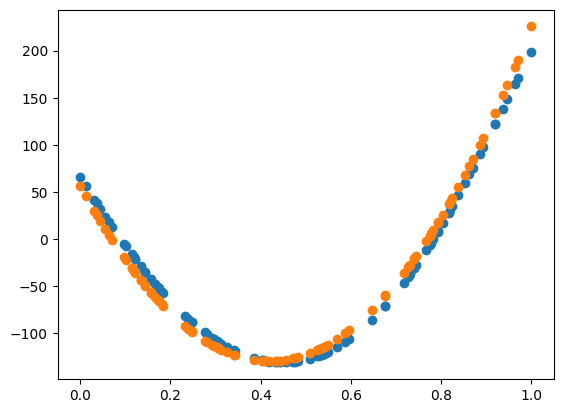

MSE on test data after epoch 1300: 109.04619526869321


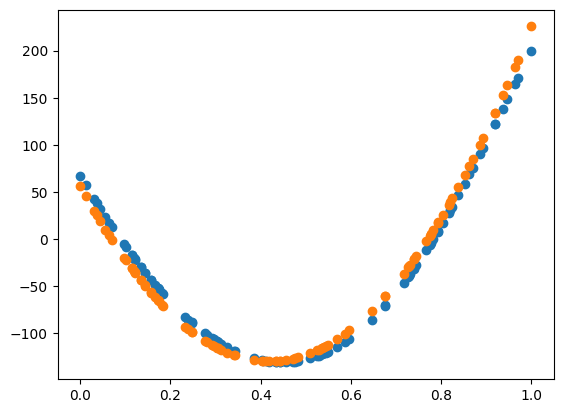

MSE on test data after epoch 1400: 106.15182450240128


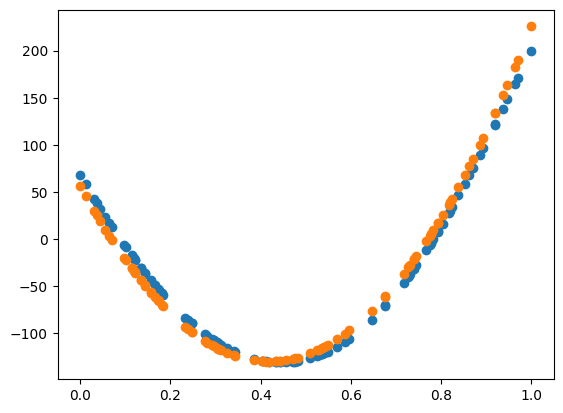

MSE on test data after epoch 1500: 103.8070569579284


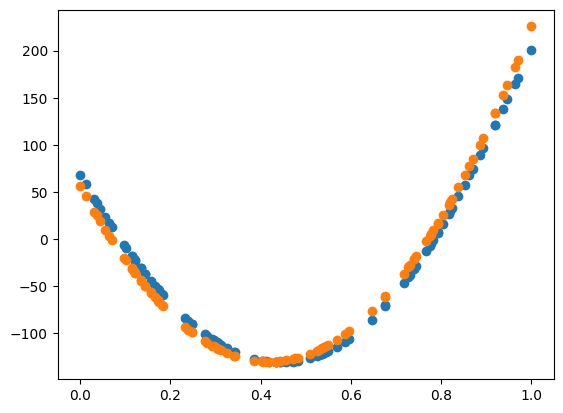

MSE on test data after epoch 1600: 101.88496010991686


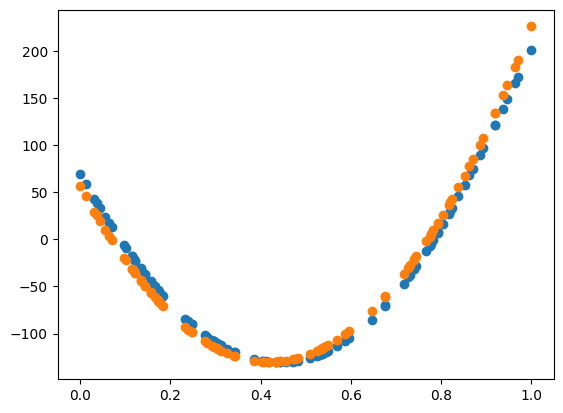

MSE on test data after epoch 1700: 100.29276199737427


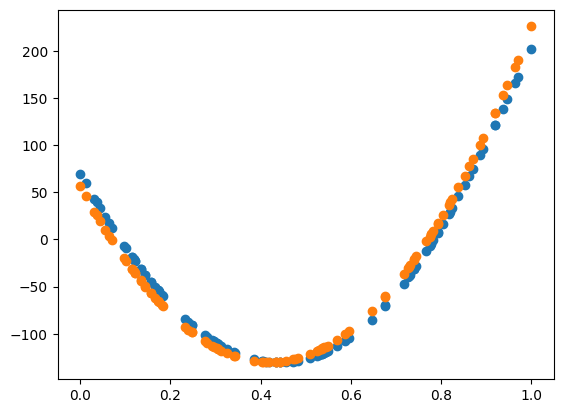

MSE on test data after epoch 1800: 98.96151104469908


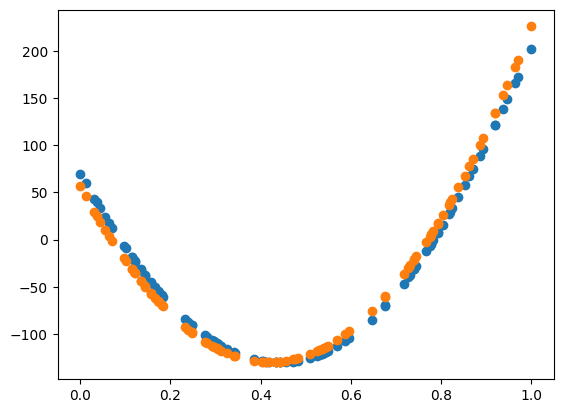

MSE on test data after epoch 1900: 97.83916756918727


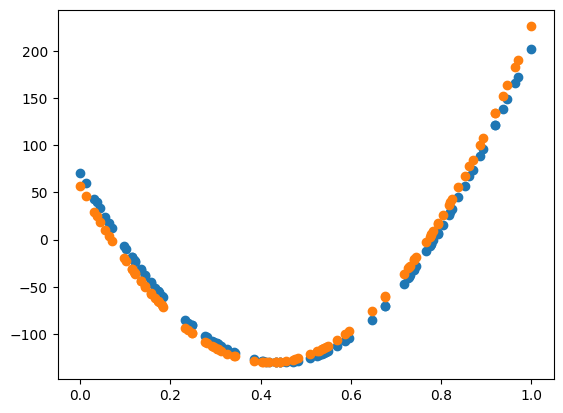

MSE on test data after epoch 2000: 96.88590298603616


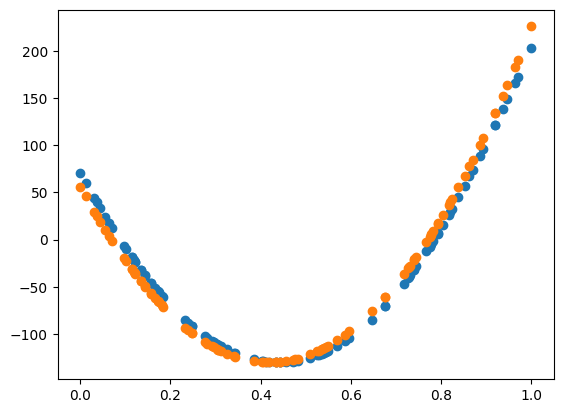

MSE on test data after epoch 2100: 96.07084433125647


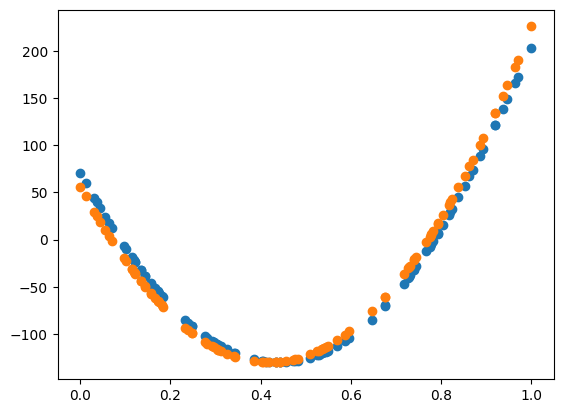

MSE on test data after epoch 2200: 95.36978148945558


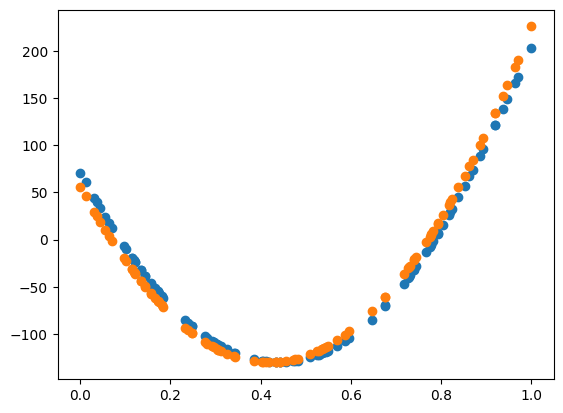

MSE on test data after epoch 2300: 94.76352678909538


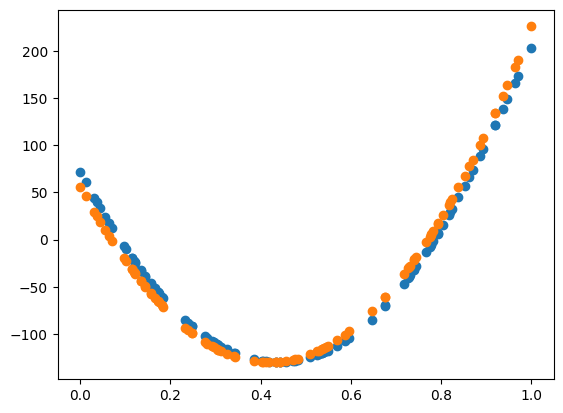

MSE on test data after epoch 2400: 94.23672410299406


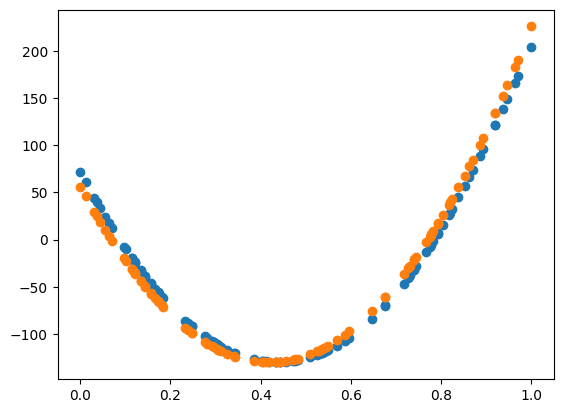

MSE on test data after epoch 2500: 93.77697261179743


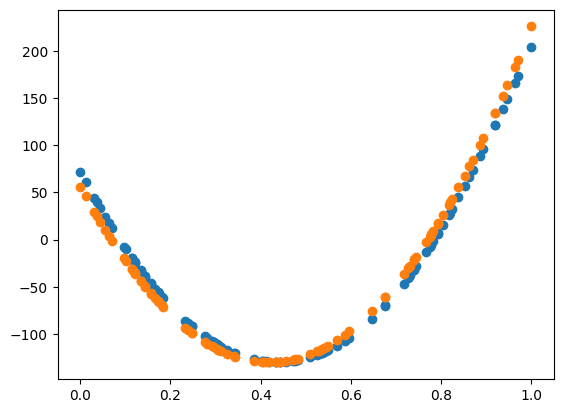

MSE on test data after epoch 2600: 93.37417411520131


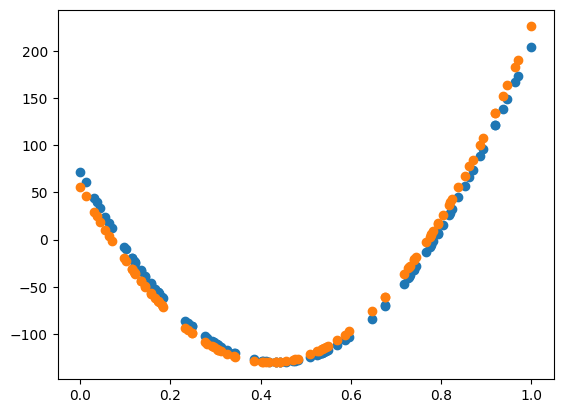

MSE on test data after epoch 2700: 93.02004134319695


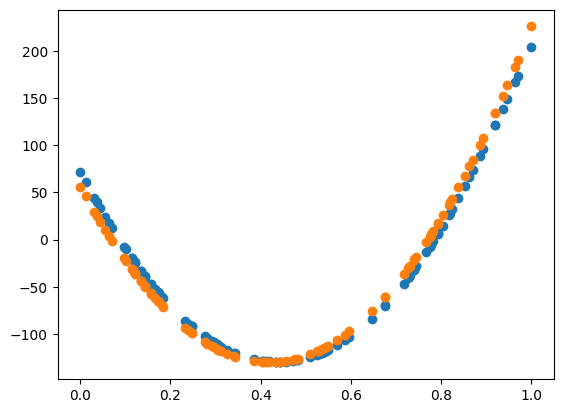

MSE on test data after epoch 2800: 92.70772368783139


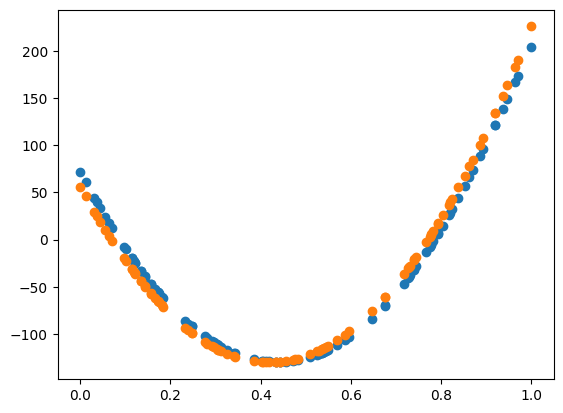

MSE on test data after epoch 2900: 92.43151956765372


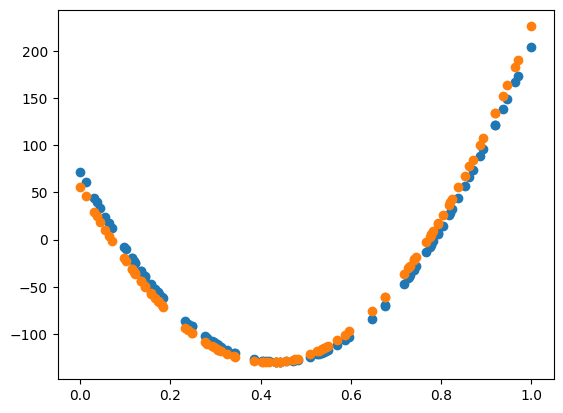

MSE on test data after epoch 3000: 92.18665339375517


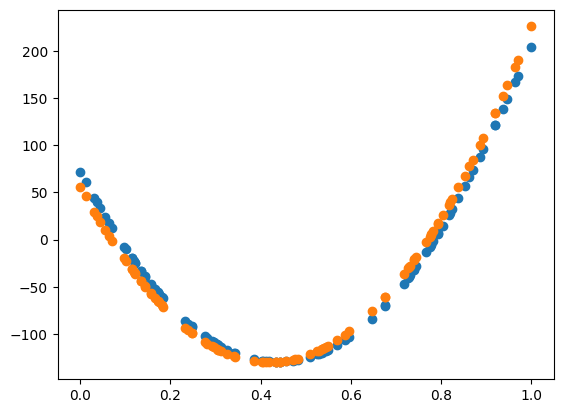

MSE on test data after epoch 3100: 91.96910118492157


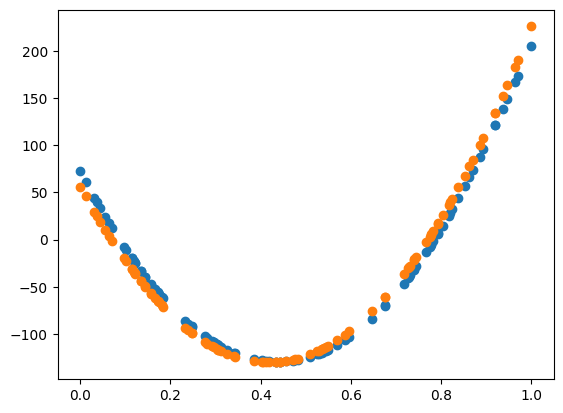

MSE on test data after epoch 3200: 91.77545315400135


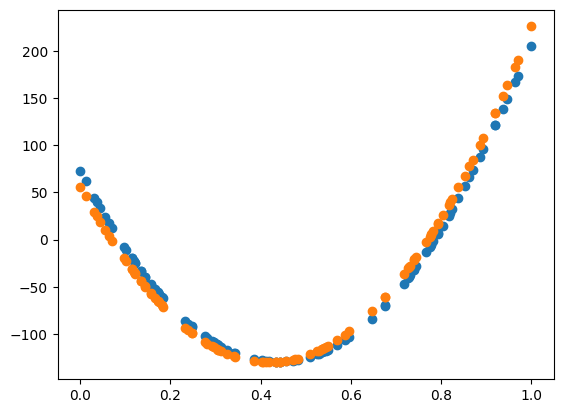

MSE on test data after epoch 3300: 91.60280463070325


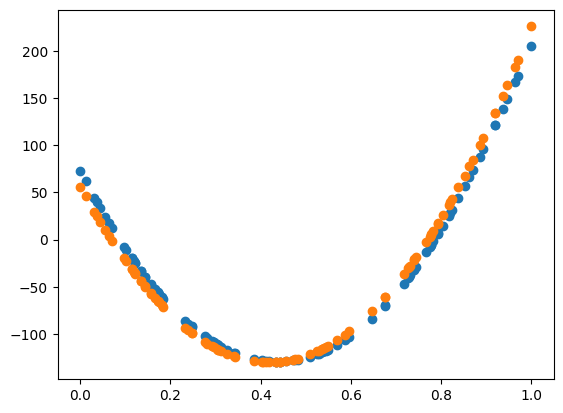

MSE on test data after epoch 3400: 91.44866887586477


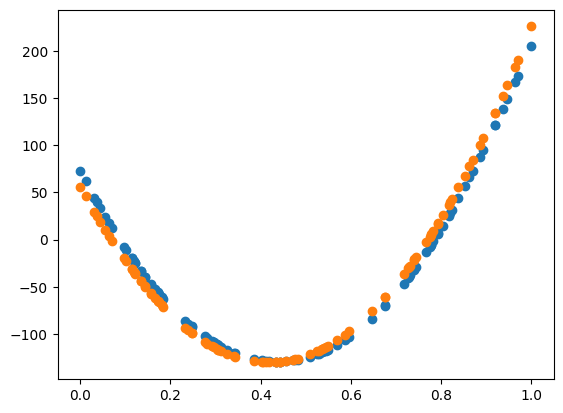

MSE on test data after epoch 3500: 91.31090693522961


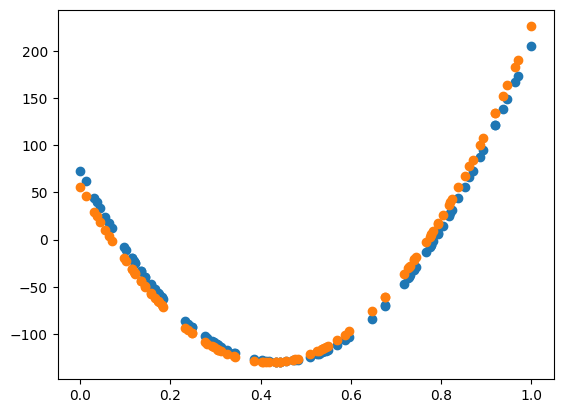

MSE on test data after epoch 3600: 91.1876708497761


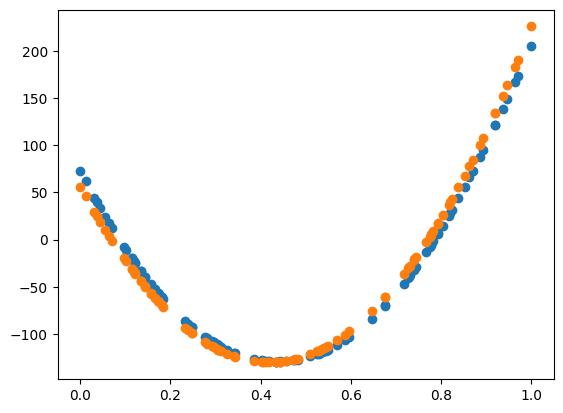

MSE on test data after epoch 3700: 91.07735740612902


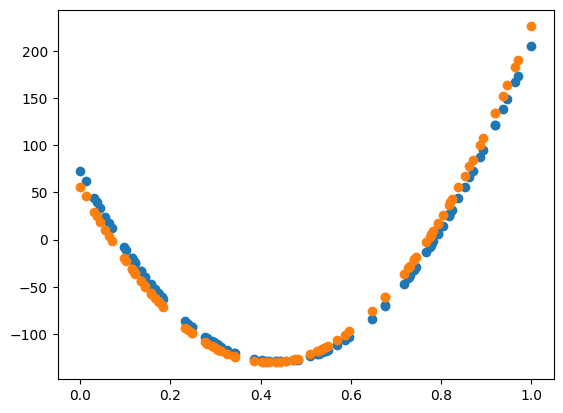

MSE on test data after epoch 3800: 90.97857025718537


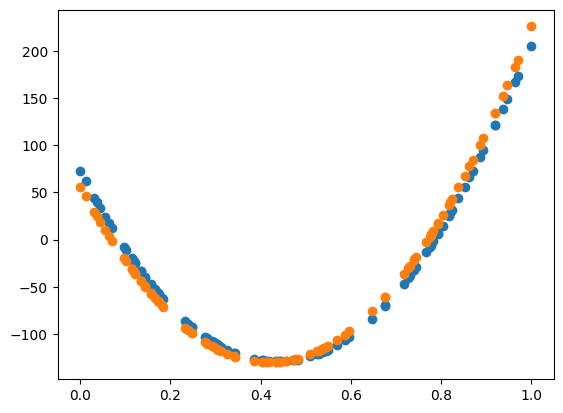

MSE on test data after epoch 3900: 90.89008873026823


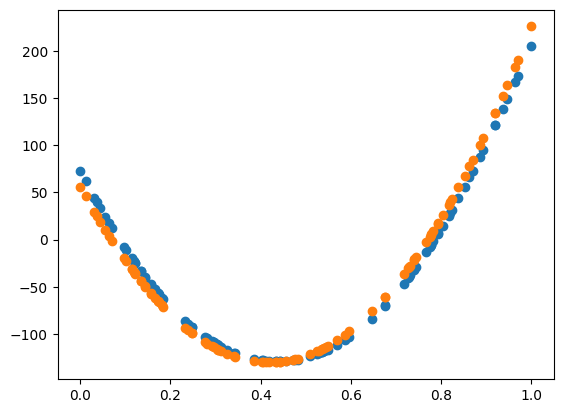

MSE on test data after epoch 4000: 90.81084200908863


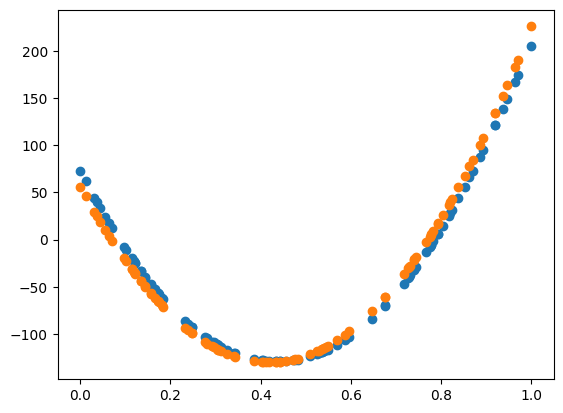

MSE on test data after epoch 4100: 90.73988765787686


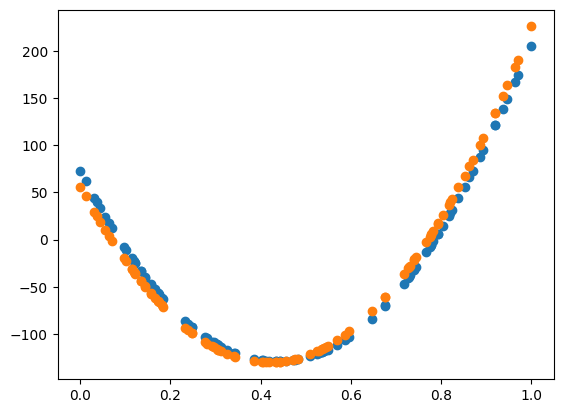

MSE on test data after epoch 4200: 90.67639367254009


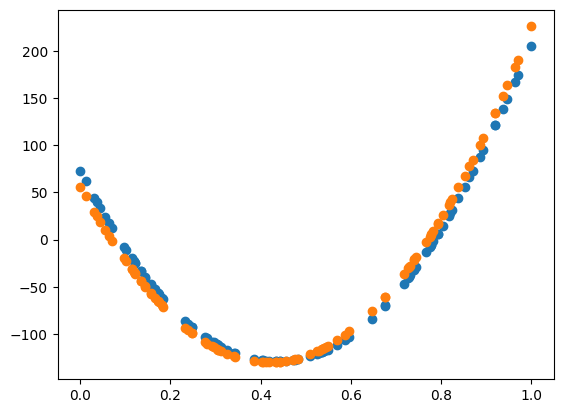

MSE on test data after epoch 4300: 90.61962341124952


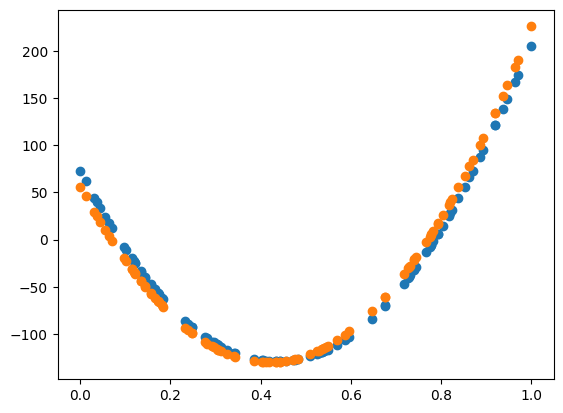

MSE on test data after epoch 4400: 90.56892288708103


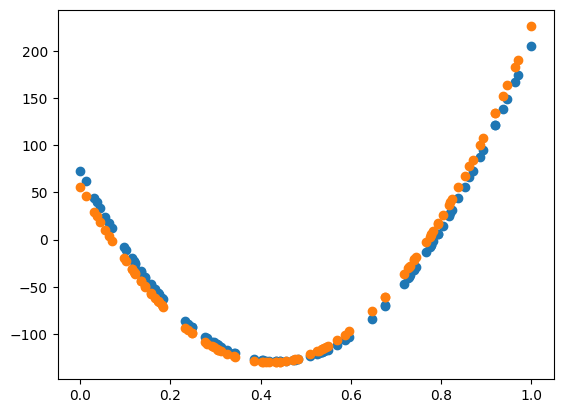

MSE on test data after epoch 4500: 90.5237100076399


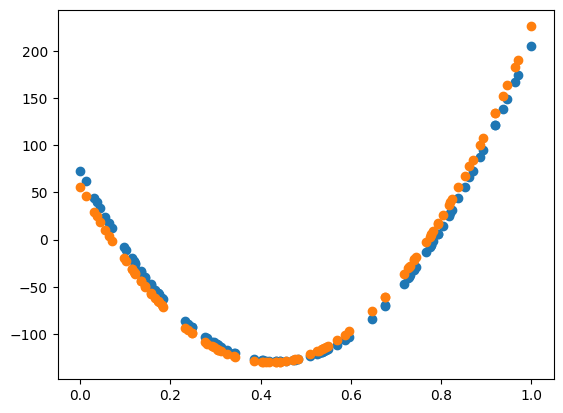

MSE on test data after epoch 4600: 90.48346542631256


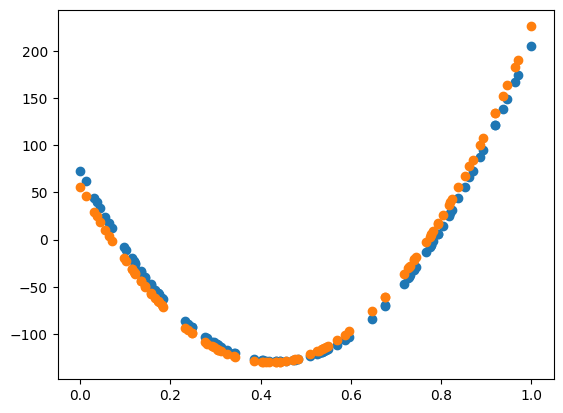

MSE on test data after epoch 4700: 90.44772473363537


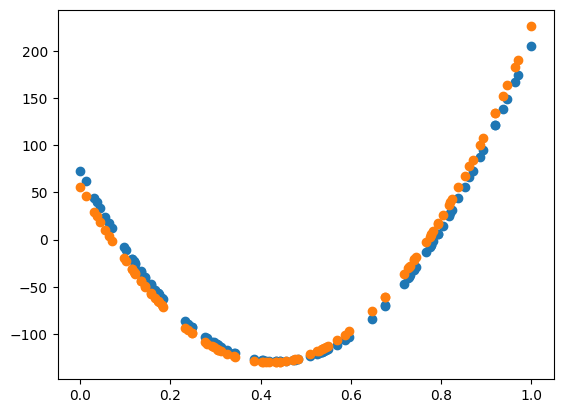

MSE on test data after epoch 4800: 90.41607176750873


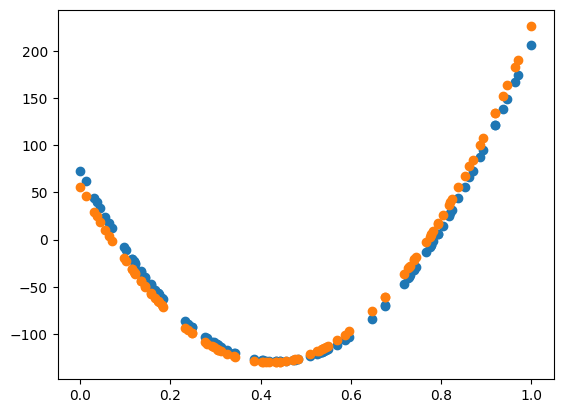

MSE on test data after epoch 4900: 90.38813286133882


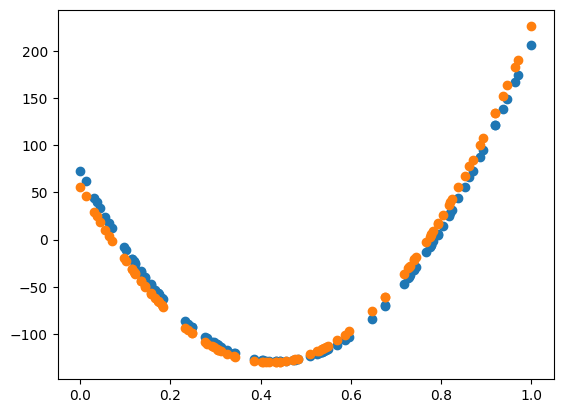

MSE on test data after epoch 5000: 90.36357188131005


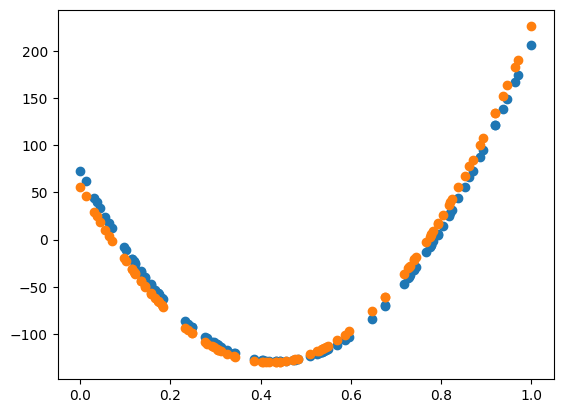

MSE on test data after epoch 5100: 90.34208593049924


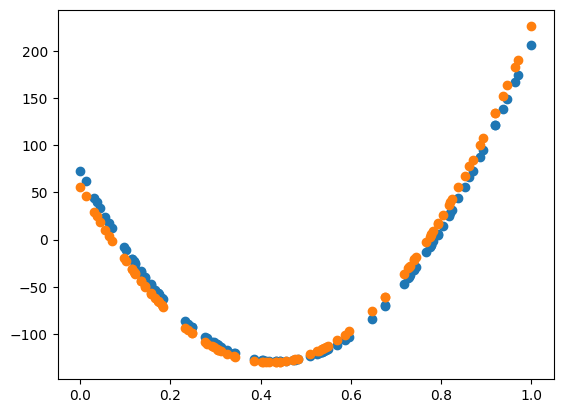

MSE on test data after epoch 5200: 90.3234016179116


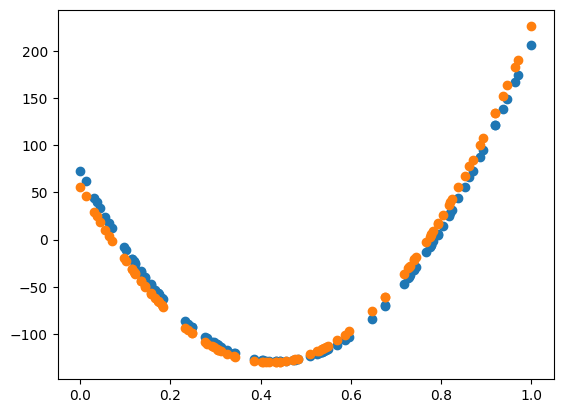

KeyboardInterrupt: 

In [45]:
nn = NN(input_num=1, hidden=[2,5], output_num=1)

train_until_target(nn, X_train_normalized, y_train_normalized, X_test_normalized, y_test,min_train_y, max_train_y, 0.1, 50000, 4 )
